In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/bez/Desktop/HousePricePrediction/house_price_prediction_with_anomalies.csv")

df.head(10)

,HouseID,Bedrooms,Bathrooms,SquareFootage,Neighborhood,YearBuilt,SellingPrice
0,HOUSE001,4,3,1595.0,Rural,2007.0,285869.53
1,HOUSE002,5,2,632.0,Suburban,2016.0,359909.47
2,HOUSE003,2,2,2443.0,Suburban,1995.0,119223.57
3,HOUSE004,4,2,2163.0,Rural,1973.0,479658.29
4,HOUSE005,4,2,2781.0,Rural,1981.0,454672.15
5,HOUSE006,5,2,825.0,Suburban,1996.0,204357.45
6,HOUSE007,2,2,2463.0,Downtown,NaN,106121.82
7,HOUSE008,2,3,2329.0,Downtown,2015.0,473374.52
8,HOUSE009,4,3,2838.0,Suburban,1976.0,300415.95
9,HOUSE010,3,2,2296.0,Downtown,1951.0,315750.98


In [3]:
df.describe()
# Selling Price has big difference between min & max & 25% values -> big data variance -> outliers
# Square Footage has big standard deviation and notable difference between min & max

# Check-out details for 500-4k sqf and 13k-498k selling price.

,Bedrooms,Bathrooms,SquareFootage,YearBuilt,SellingPrice
count,100.000000,100.000000,97.000000,97.000000,100.000000
mean,3.640000,2.040000,1914.804124,1987.989691,305835.462556
std,1.114822,0.863631,1082.922095,21.167238,123320.191797
min,2.000000,1.000000,500.000000,1950.000000,13415.632105
25%,3.000000,1.000000,832.000000,1968.000000,204337.540000
50%,4.000000,2.000000,1936.000000,1992.000000,320334.985000
75%,5.000000,3.000000,2786.000000,2007.000000,400102.230000
max,5.000000,3.000000,3952.000000,2019.000000,498372.500000


In [4]:
df.info()
df.shape
# We have max 6 rows with NaN values. Removing them would result in big loss of data and model not performing well as the dataset is already small.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HouseID        100 non-null    object 
 1   Bedrooms       100 non-null    int64  
 2   Bathrooms      100 non-null    int64  
 3   SquareFootage  97 non-null     float64
 4   Neighborhood   100 non-null    object 
 5   YearBuilt      97 non-null     float64
 6   SellingPrice   100 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.6+ KB


(100, 7)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(100, 7)


## [X] Replace null values in SquareFootage & YearBuilt with mean imputation (replacing them with mean value of the column)

## [X] Replace Square Footage values with 35-100% of the column values

## [X] Deal with Outliers in Selling Price

# Replacing Null Values with mean of the column

In [6]:
df['SquareFootage'] = df['SquareFootage'].fillna(df['SquareFootage'].mean())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean())
df.isnull().sum()

HouseID          0
Bedrooms         0
Bathrooms        0
SquareFootage    0
Neighborhood     0
YearBuilt        0
SellingPrice     0
dtype: int64


# Analyzing Square Footage

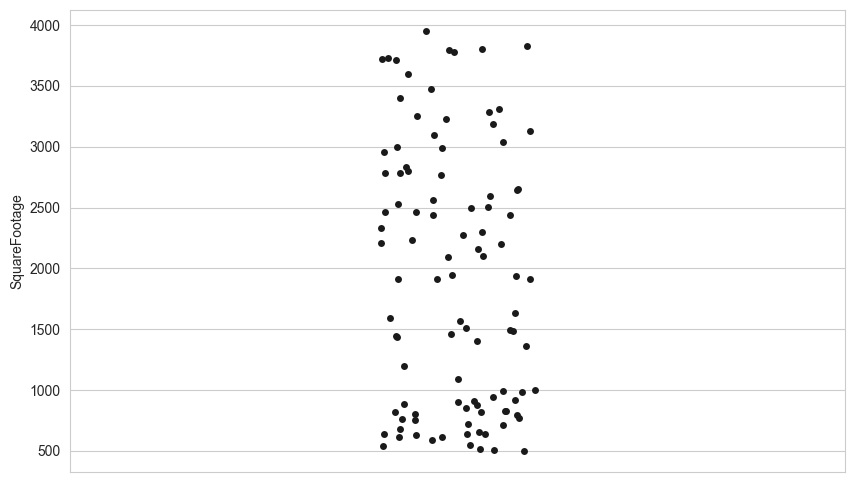

In [7]:
# Create box plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(data=df["SquareFootage"], color="0.1")
plt.show()

In [8]:
sqf_500_800 = df[(df['SquareFootage'] >= 500) & (df['SquareFootage'] <= 800)]
sqf_500_800

,HouseID,Bedrooms,Bathrooms,SquareFootage,Neighborhood,YearBuilt,SellingPrice
1,HOUSE002,5,2,632.0,Suburban,2016.0,359909.47
16,HOUSE017,5,3,617.0,Downtown,1991.0,420379.72
18,HOUSE019,5,2,774.0,Rural,1999.0,329346.82
23,HOUSE024,5,3,711.0,Downtown,1956.0,428170.74
24,HOUSE025,5,1,724.0,Suburban,2006.0,360593.91
28,HOUSE029,5,1,519.0,Downtown,2014.0,250903.63
29,HOUSE030,5,1,612.0,Rural,1957.0,115585.25
32,HOUSE033,5,3,639.0,Suburban,1964.0,362289.05
36,HOUSE037,5,1,546.0,Suburban,2000.0,204277.81
43,HOUSE044,5,3,500.0,Downtown,2007.0,487032.22


In [9]:
sqf_35k = df[(df['SquareFootage'] >= 3500)]
sqf_35k

,HouseID,Bedrooms,Bathrooms,SquareFootage,Neighborhood,YearBuilt,SellingPrice
38,HOUSE039,2,1,3799.0,Downtown,2007.0,377156.140000
39,HOUSE040,4,2,3952.0,Downtown,2012.0,239334.640000
65,HOUSE066,3,3,3731.0,Downtown,1966.0,483416.600000
67,HOUSE068,2,3,3829.0,Downtown,1968.0,241962.080000
69,HOUSE070,3,1,3599.0,Downtown,2004.0,370707.960000
78,HOUSE079,4,1,3802.0,Suburban,1997.0,412518.420000
85,HOUSE086,4,3,3711.0,Downtown,1971.0,15796.499345
89,HOUSE090,3,3,3776.0,Rural,2000.0,434785.550000
94,HOUSE095,3,2,3719.0,Rural,2011.0,258660.640000


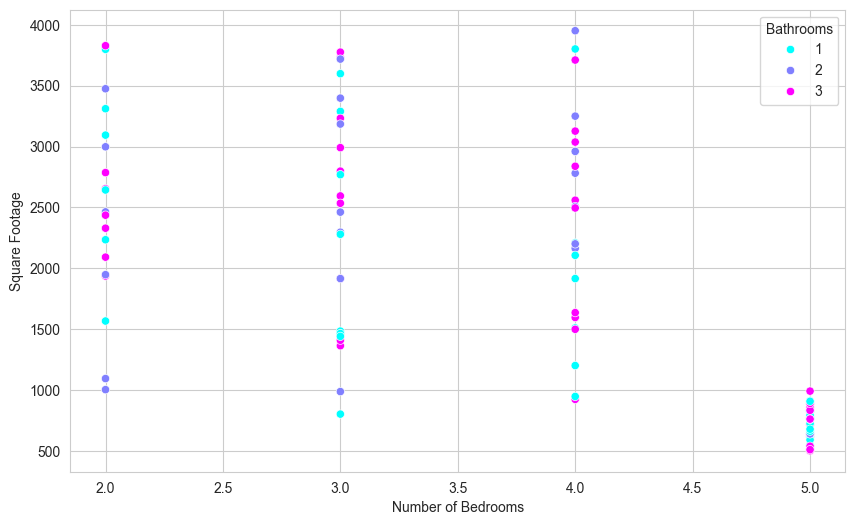

In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bedrooms', y='SquareFootage', hue='Bathrooms', palette="cool", alpha=1)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Square Footage')
plt.show()

In [11]:
more_than_4_bedrooms = df[df["Bedrooms"] > 4].copy()
more_than_4_bedrooms
# Inconsistent data is when there are more than 4 bedrooms but the square footage is too low in comparison. We can't remove them as they are a lot. The variance of square footage between houses with 2 and 4 bedrooms ain't that big either. So, we can just impute random data between 25%-100%.

# Note: Tried Regression Imputation, but it doesn't really work.

,HouseID,Bedrooms,Bathrooms,SquareFootage,Neighborhood,YearBuilt,SellingPrice
1,HOUSE002,5,2,632.0,Suburban,2016.0,359909.47
5,HOUSE006,5,2,825.0,Suburban,1996.0,204357.45
14,HOUSE015,5,1,909.0,Rural,1997.0,446879.57
16,HOUSE017,5,3,617.0,Downtown,1991.0,420379.72
17,HOUSE018,5,1,823.0,Rural,1975.0,370867.34
18,HOUSE019,5,2,774.0,Rural,1999.0,329346.82
23,HOUSE024,5,3,711.0,Downtown,1956.0,428170.74
24,HOUSE025,5,1,724.0,Suburban,2006.0,360593.91
28,HOUSE029,5,1,519.0,Downtown,2014.0,250903.63
29,HOUSE030,5,1,612.0,Rural,1957.0,115585.25


In [12]:
lower_bound = df['SquareFootage'].quantile(0.35)
upper_bound = df['SquareFootage'].max()

In [13]:
more_than_4_bedrooms['SquareFootage'] = np.random.uniform(lower_bound, upper_bound, size=len(more_than_4_bedrooms))
more_than_4_bedrooms

,HouseID,Bedrooms,Bathrooms,SquareFootage,Neighborhood,YearBuilt,SellingPrice
1,HOUSE002,5,2,2879.049937,Suburban,2016.0,359909.47
5,HOUSE006,5,2,1460.954778,Suburban,1996.0,204357.45
14,HOUSE015,5,1,3264.430038,Rural,1997.0,446879.57
16,HOUSE017,5,3,3373.992764,Downtown,1991.0,420379.72
17,HOUSE018,5,1,3025.210630,Rural,1975.0,370867.34
18,HOUSE019,5,2,3889.491994,Rural,1999.0,329346.82
23,HOUSE024,5,3,2497.910767,Downtown,1956.0,428170.74
24,HOUSE025,5,1,1790.246461,Suburban,2006.0,360593.91
28,HOUSE029,5,1,2437.153191,Downtown,2014.0,250903.63
29,HOUSE030,5,1,2931.634546,Rural,1957.0,115585.25


In [14]:
df.update(more_than_4_bedrooms)

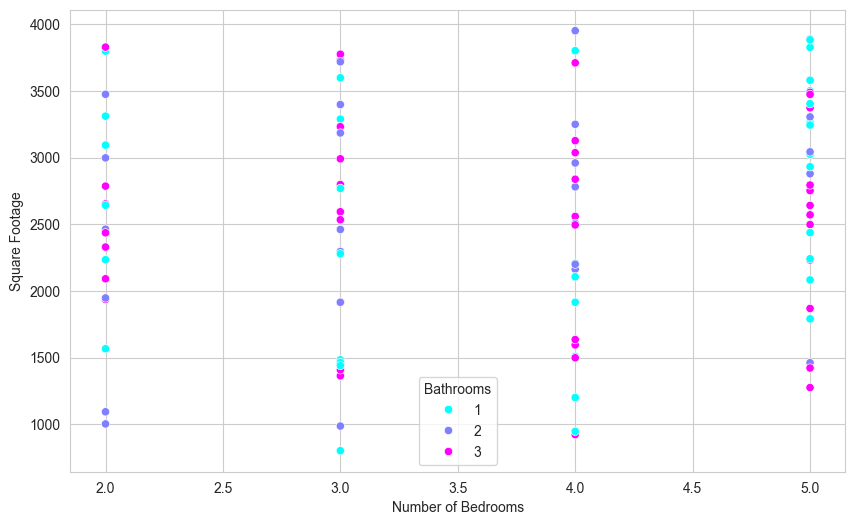

In [15]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bedrooms', y='SquareFootage', hue='Bathrooms', palette="cool", alpha=1)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Square Footage')
plt.show()

# Removing the outliers -> just 3

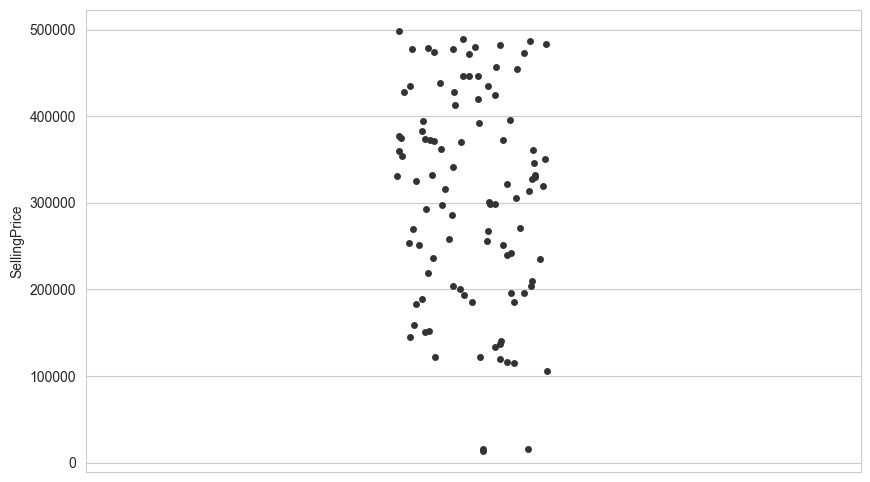

In [16]:
# Create box plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(data=df["SellingPrice"], color="0.2")
plt.show()

In [20]:
outliers = df[df["SellingPrice"] < 100000]
outliers


,HouseID,Bedrooms,Bathrooms,SquareFootage,Neighborhood,YearBuilt,SellingPrice
30,HOUSE031,2,3,1936.0,Downtown,1965.0,13415.632105
85,HOUSE086,4,3,3711.0,Downtown,1971.0,15796.499345
87,HOUSE088,2,1,2643.0,Rural,1975.0,15372.634167


In [21]:
df.drop(["HouseID"], inplace=True, axis=1)
df = df[df["SellingPrice"] > 100000]
df.shape

(97, 6)

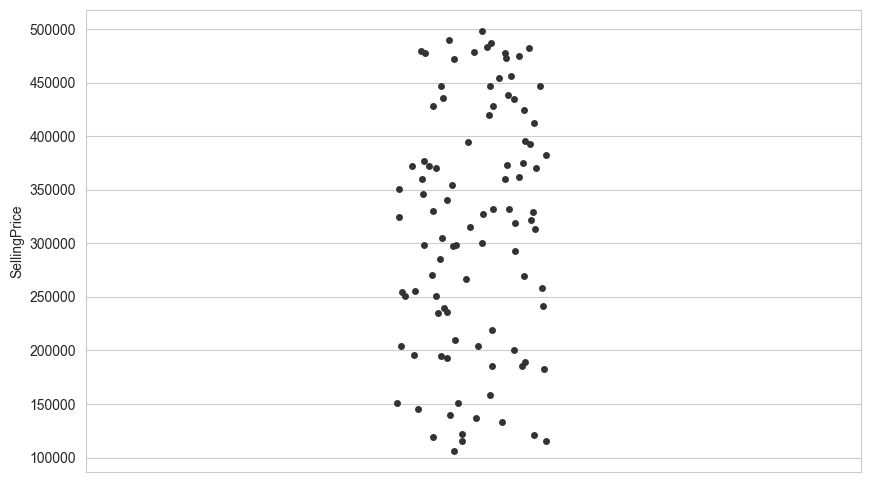

In [22]:
# Create box plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(data=df["SellingPrice"], color="0.2")
plt.show()

In [23]:
# Divide the df into label and feature.
X = df.drop("SellingPrice", axis=1) 
y = df["SellingPrice"]

### One Hot Encoding -> turn categorical data into numerical for Model Feeding

In [24]:
X = pd.get_dummies(df, columns=["Neighborhood"])
X = X.astype(int)
X
# Drop one of the dummy column

,Bedrooms,Bathrooms,SquareFootage,YearBuilt,SellingPrice,Neighborhood_Downtown,Neighborhood_Rural,Neighborhood_Suburban
0,4,3,1595,2007,285869,0,1,0
1,5,2,2879,2016,359909,0,0,1
2,2,2,2443,1995,119223,0,0,1
3,4,2,2163,1973,479658,0,1,0
4,4,2,2781,1981,454672,0,1,0
...,...,...,...,...,...,...,...,...
95,3,1,1440,2018,456758,0,0,1
96,3,2,1914,1965,158641,1,0,0
97,5,1,2241,1997,305330,0,0,1
98,3,1,2769,1988,193291,0,1,0


array([[<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'SquareFootage'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'SellingPrice'}>,
        <Axes: title={'center': 'Neighborhood_Downtown'}>],
       [<Axes: title={'center': 'Neighborhood_Rural'}>,
        <Axes: title={'center': 'Neighborhood_Suburban'}>, <Axes: >]],
      dtype=object)

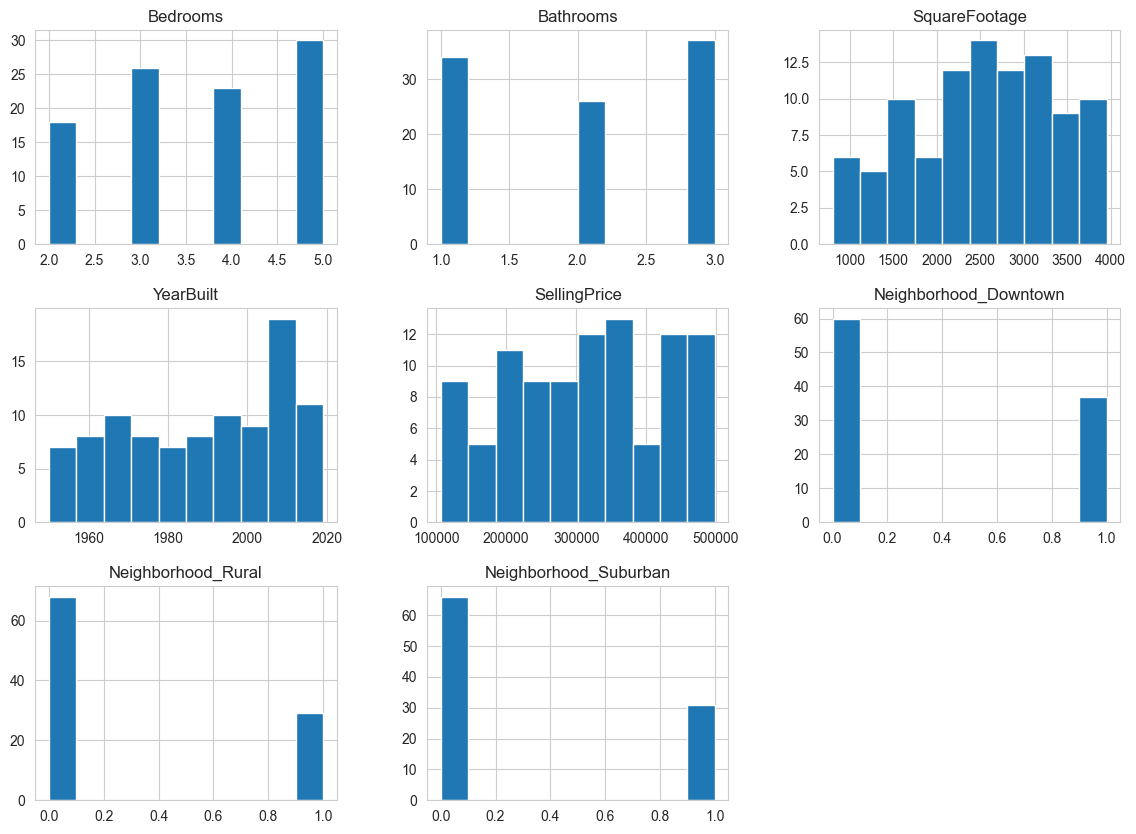

In [25]:
X.hist(figsize=(14, 10))

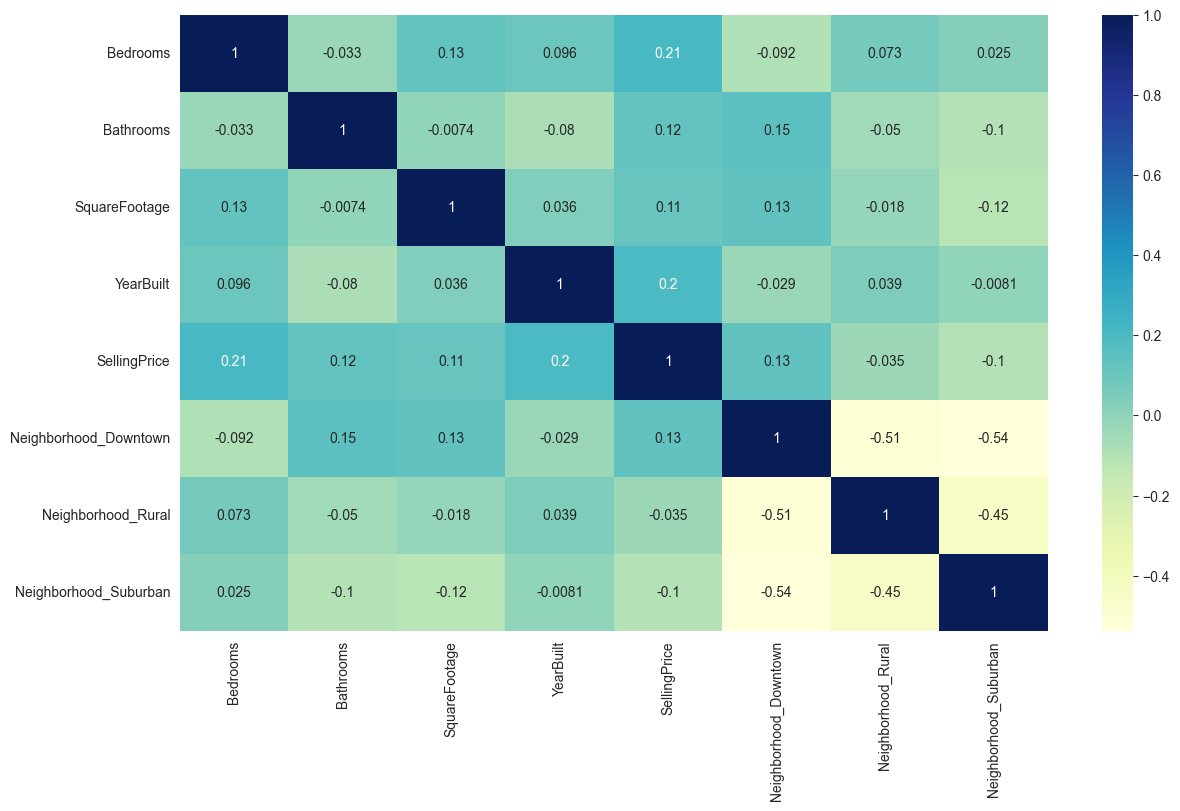

In [26]:
# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Scaling the Data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Bedrooms,Bathrooms,SquareFootage,YearBuilt,SellingPrice,Neighborhood_Downtown,Neighborhood_Rural,Neighborhood_Suburban
0,0.299813,1.133435,-1.118971,0.888771,-0.255799,-0.785281,1.531283,-0.685344
1,1.208620,-0.036173,0.411224,1.321267,0.398069,-0.785281,-0.653047,1.459120
2,-1.517802,-0.036173,-0.108375,0.312110,-1.727498,-0.785281,-0.653047,1.459120
3,0.299813,-0.036173,-0.442062,-0.745101,1.455607,-0.785281,1.531283,-0.685344
4,0.299813,-0.036173,0.294434,-0.360661,1.234948,-0.785281,1.531283,-0.685344
...,...,...,...,...,...,...,...,...
92,-0.608994,-1.205782,-1.303691,1.417377,1.253370,-0.785281,-0.653047,1.459120
93,-0.608994,-0.036173,-0.738806,-1.129542,-1.379386,1.273429,-0.653047,-0.685344
94,1.208620,-1.205782,-0.349106,0.408220,-0.083934,-0.785281,-0.653047,1.459120
95,-0.608994,-1.205782,0.280133,-0.024275,-1.073382,-0.785281,1.531283,-0.685344


## Model Training

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77, 8), (20, 8), (77,), (20,))

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
X_test

,Bedrooms,Bathrooms,SquareFootage,YearBuilt,SellingPrice,Neighborhood_Downtown,Neighborhood_Rural,Neighborhood_Suburban
62,-1.517802,-0.036173,-1.717225,-0.456771,-1.544072,1.273429,-0.653047,-0.685344
40,0.299813,-0.036173,0.507755,-0.841212,-1.758840,1.273429,-0.653047,-0.685344
93,-0.608994,-0.036173,-0.738806,-1.129542,-1.379386,1.273429,-0.653047,-0.685344
18,1.208620,-0.036173,1.614883,0.504331,0.128159,-0.785281,1.531283,-0.685344
81,-1.517802,1.133435,0.300392,1.177102,1.620875,1.273429,-0.653047,-0.685344
83,0.299813,-1.205782,-1.892411,1.417377,0.706325,-0.785281,-0.653047,1.459120
64,-0.608994,1.133435,1.426588,-1.081487,1.488795,1.273429,-0.653047,-0.685344
42,1.208620,1.133435,-0.793626,0.888771,1.520729,1.273429,-0.653047,-0.685344
10,0.299813,1.133435,0.599520,-1.081487,0.518846,-0.785281,-0.653047,1.459120
0,0.299813,1.133435,-1.118971,0.888771,-0.255799,-0.785281,1.531283,-0.685344


In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred[:10]

array([139993.57637326, 115674.51132348, 158641.53544492, 329346.46756961,
       498372.57973322, 394814.61819574, 483416.51027259, 487032.54676146,
       373585.5829376 , 285869.54998427])

In [34]:
y_test[:10]

63    139993.95
41    115674.53
96    158641.93
18    329346.82
82    498372.50
84    394814.22
65    483416.60
43    487032.22
10    373585.51
0     285869.53
Name: SellingPrice, dtype: float64

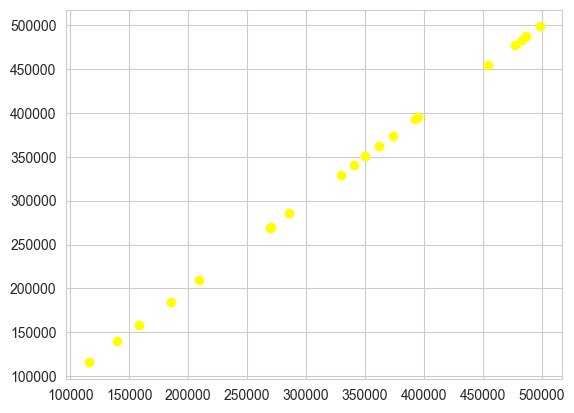

In [35]:
plt.scatter(y_test, y_pred, color="yellow")
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mea = mean_absolute_error(y_test, y_pred)
mea

np.float64(0.2349881703266874)

In [37]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(0.0803253528625443)

In [38]:
model.score(X_test, y_test)

0.9999999999942933

### Tried with Ridge & Lasso

In [39]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [40]:
y_pred1 = ridge.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(0.0803253528625443)

In [42]:
r2 = r2_score(y_test, y_pred)
r2

0.9999999999942933

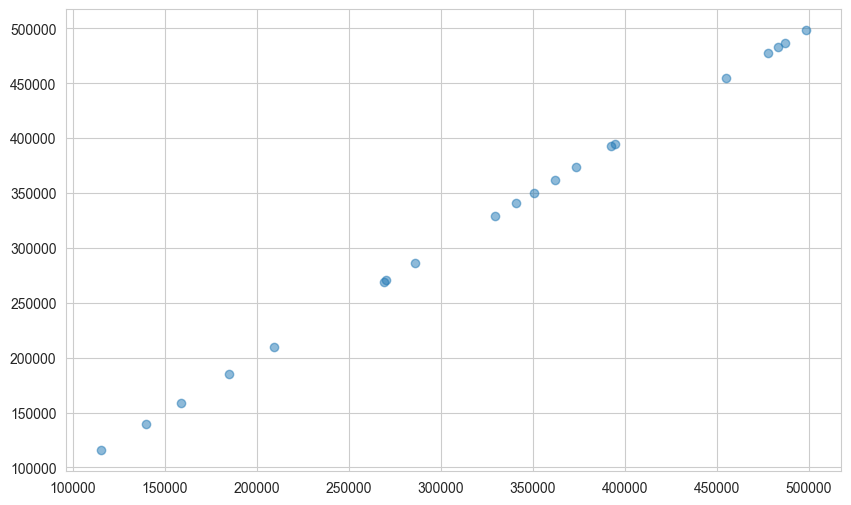

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.show()

In [44]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [45]:
y_pred = lasso.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(0.9554204913949997)

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.999999999932123

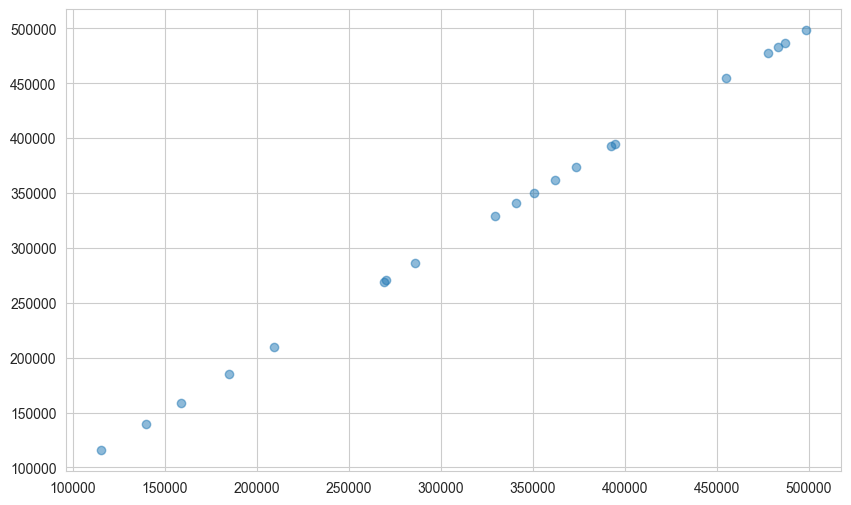

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.show()